In [1]:
import pypsa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from glob import glob
from tqdm import tqdm
import seaborn as sb
from pathlib import Path

In [2]:
n = pypsa.Network("../results/advanced_nuclear_v2.0/networks/illinois_solved.nc")

c:\Users\sdotson\AppData\Local\miniforge3\envs\pypsa-illinois-test05\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning:

Engine 'rasterio' loading failed:
DLL load failed while importing _version: The specified procedure could not be found.

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


## Test a range of capital cost overruns for advanced nuclear reactors.

In [3]:
delta = 0.25
costs = np.arange(1.25, 3+delta, delta)

In [4]:
smr_cost_2030 = n.generators.loc[n.generators.index.str.contains('SMR'), 'capital_cost'].unique()[0]

In [5]:
results_path = Path("../results/advanced_nuclear_sensitivity/")
results_path.mkdir(parents=True, exist_ok=True)

# results = [n]
for cost in tqdm(costs):
    n_test = n.copy()
    n_test.generators.loc[n_test.generators.index.str.contains('SMR'), 'capital_cost'] = smr_cost_2030*cost
    
    n_test.optimize(solver_name='cplex', multi_investment_periods=True)
    
    scenario = f"cost-2023_growth_0.02_demand-1.85E+08_atb-Moderate-X-{cost}_v2.0"
    
    network_folder = results_path/scenario
    network_folder.mkdir(exist_ok=True)
    
    # results.append(n_test)
    n_test.export_to_netcdf(str(network_folder/"illinois_solved.nc"))

  0%|          | 0/8 [00:00<?, ?it/s]WARNING:pypsa.consistency:The following lines have carriers which are not defined:
Index(['0'], dtype='object', name='Line')
Index(['MISO-Z4', 'ComEd'], dtype='object', name='Bus')
Index(['0'], dtype='object', name='Line')
Index(['MISO-Z4', 'ComEd'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Cplex solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]
INFO:linopy.io: Writing time: 49.5s


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 28.50 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.50e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.70 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

Markowitz threshold set to 0.1


Iteration: 356578   Dual objective     =  265313803206.761688
Elapsed time = 293.88 sec. (170880.40 ticks, 356580 iterations)
Iteration: 356580   Dual objective     =  265313803327.016388
Iteration: 362111   Dual objective     =  265410583482.294586
Iteration: 365963   Dual objective     =  266694837774.964050
Elapsed time = 316.14 sec. (180884.13 ticks, 367738 iterations)
Iteration: 368691   Dual objective     =  266776530655.222809
Iteration: 370725   Dual objective     =  266825526584.165680
Elapsed time = 338.17 sec. (190884.64 ticks, 371452 iterations)
Iteration: 372798   Dual objective     =  266929654615.190247
Iteration: 374608   Dual objective     =  267129419775.715424
Elapsed time = 357.14 sec. (200887.03 ticks, 376178 iterations)
Iteration: 376597   Dual objective     =  267283417333.053741
Iteration: 378685   Dual objective     =  267480830596.079224
Elapsed time = 374.92 sec. (210888.55 ticks, 379680 iterations)
Iteration: 380760   Dual objective     =  267735198765.49514

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.77e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.59 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

Markowitz threshold set to 0.1


Iteration: 369471   Dual objective     =  269675338242.301422
Iteration: 375929   Dual objective     =  269800919573.675293
Elapsed time = 358.22 sec. (201085.94 ticks, 377884 iterations)
Iteration: 378338   Dual objective     =  270011639618.210236
Iteration: 382936   Dual objective     =  270145409120.147430
Iteration: 385794   Dual objective     =  270333220914.691467
Elapsed time = 377.55 sec. (211086.24 ticks, 387231 iterations)
Iteration: 390029   Dual objective     =  271055723171.083466
Iteration: 392362   Dual objective     =  271433633568.467255
Elapsed time = 398.55 sec. (221088.54 ticks, 393514 iterations)
Iteration: 395197   Dual objective     =  271921358491.307098
Iteration: 397488   Dual objective     =  272148435334.281616
Elapsed time = 418.30 sec. (231104.93 ticks, 397819 iterations)
Iteration: 399497   Dual objective     =  272256411313.003082
Elapsed time = 441.83 sec. (241106.81 ticks, 402083 iterations)
Iteration: 402084   Dual objective     =  272332522698.75866

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.89e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.70 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 3.98e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 19.84 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

Markowitz threshold set to 0.1


Iteration: 365289   Dual objective     =  296903021455.105652
Iteration: 365290   Dual objective     =  296903021823.627380
Elapsed time = 292.95 sec. (170686.08 ticks, 369535 iterations)
Iteration: 371111   Dual objective     =  296929521431.759644
Iteration: 373626   Dual objective     =  297021430490.784485
Iteration: 375043   Dual objective     =  297478537624.537048
Elapsed time = 316.81 sec. (180689.21 ticks, 376042 iterations)
Iteration: 377823   Dual objective     =  298052298559.291931
Iteration: 382514   Dual objective     =  298140991639.741516
Iteration: 383655   Dual objective     =  298186631228.355835
Iteration: 385193   Dual objective     =  298363473441.389526
Elapsed time = 341.19 sec. (190693.03 ticks, 385688 iterations)
Iteration: 386696   Dual objective     =  298525972751.279175
Iteration: 388302   Dual objective     =  299325369687.097290
Elapsed time = 368.30 sec. (200695.16 ticks, 389397 iterations)
Iteration: 389994   Dual objective     =  299832449013.531738


INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 4.05e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 22.14 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 4.10e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 21.64 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 4.14e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 12 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 10 threads...
 * Starting primal Simplex on 1 thread...
Tried aggregator 1 time.
LP Presolve eliminated 8418758 rows and 1765649 columns.
Aggregator did 43825 substitutions.
Reduced LP has 2391066 rows, 1449287 columns, and 6975925 nonzeros.
Presolve time = 20.09 sec. (6213.33 ticks)
Symmetry aggregator did 1261392 additional substitutions.
Initializing dual steep norms . . .

Iteration log . . .
Iteration:     1   Dual objective     =   11691548788.867838
Perturbation started.
Iteration:   101   Dual objective     =   11691548788.873871
Iteration:  1744   Dual objective     =   11865349875.005598
Iteration:  3769   Dual objective     =   11999813753.159107
Iteration:  6250   Dual objective     =   12072298203.055523
Iteration:  8117   Dual

Markowitz threshold set to 0.1


Iteration: 543531   Dual objective     =  394203511849.609131
Iteration: 546841   Dual objective     =  395069265754.401489
Elapsed time = 617.33 sec. (361291.80 ticks, 549302 iterations)
Iteration: 549302   Dual objective     =  395189696530.981201
Iteration: 551431   Dual objective     =  395248534038.813293
Iteration: 553813   Dual objective     =  395362658653.616943
Elapsed time = 637.34 sec. (371291.97 ticks, 555261 iterations)
Iteration: 556113   Dual objective     =  395396161749.798706
Iteration: 559127   Dual objective     =  395441926079.128479
Elapsed time = 652.72 sec. (381292.63 ticks, 560125 iterations)
Iteration: 561315   Dual objective     =  395505126907.439270
Iteration: 563105   Dual objective     =  395941782011.531067
Removing perturbation.

Barrier solved model.



INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3258761 primals, 10853649 duals
Objective: 4.14e+11
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-ext-s-lower, Line-ext-s-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-ext-state_of_charge-upper, StorageUnit-energy_balance were not assigned to the netw

In [6]:
files = glob("../results/advanced_nuclear_sensitivity/*/*.nc")
files

['../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.25_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.5_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-1.75_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.0_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.25_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.5_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-2.75_v1.0\\illinois_solved.nc',
 '../results/advanced_nuclear_sensitivity\\cost-2023_growth_0.01_demand-1.85E+08_atb-Moderate-X-3.0_v1.0\\i

In [7]:
results = [n]
sensitivity_results = [pypsa.Network(file) for file in files]

all_results = results+sensitivity_results

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, 

In [8]:
objective_values = [r.objective for r in all_results]
objective_values

[316078855940.4691,
 296629646217.05414,
 317888557800.56537,
 326218278807.5214,
 332184472931.70886,
 337127005622.36035,
 338927585709.1731,
 339673856662.4132,
 339673856662.4136,
 349839780273.56726,
 376787211244.9371,
 389374465203.5066,
 398353363212.32983,
 405250850176.3744,
 410380184040.54645,
 413949335059.6004,
 413949335059.60077]

In [9]:
def get_active_units(n):
    c = "StorageUnit"
    df = pd.concat(
        {
            period: n.get_active_assets(c, period) * n.df(c).p_nom_opt
            for period in n.investment_periods
        },
        axis=1,
    )
    df = df.groupby(n.storage_units.carrier).sum()

    c = "Generator"
    df2 = pd.concat(
        {
            period: n.get_active_assets(c, period) * n.df(c).p_nom_opt
            for period in n.investment_periods
        },
        axis=1,
    )
    df2 = df2.groupby(n.generators.carrier).sum()
    df = pd.concat([df, df2])
    
    return df

In [10]:
costs = np.arange(1, 3+delta, delta)
costs

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [36]:
frames = []
for nc, cost in zip(all_results, np.append(costs, costs[1:])):
    df = get_active_units(nc).T
    df = df.assign(cost_overrun_pct=cost)
    frames.append(df)

In [37]:
all_df = pd.concat(frames, axis=0).reset_index()


In [38]:
data = all_df.melt(id_vars=['cost_overrun_pct', 'index'],
                value_vars=['Batteries','Coal','Natural Gas','Nuclear','Solar','Wind'])

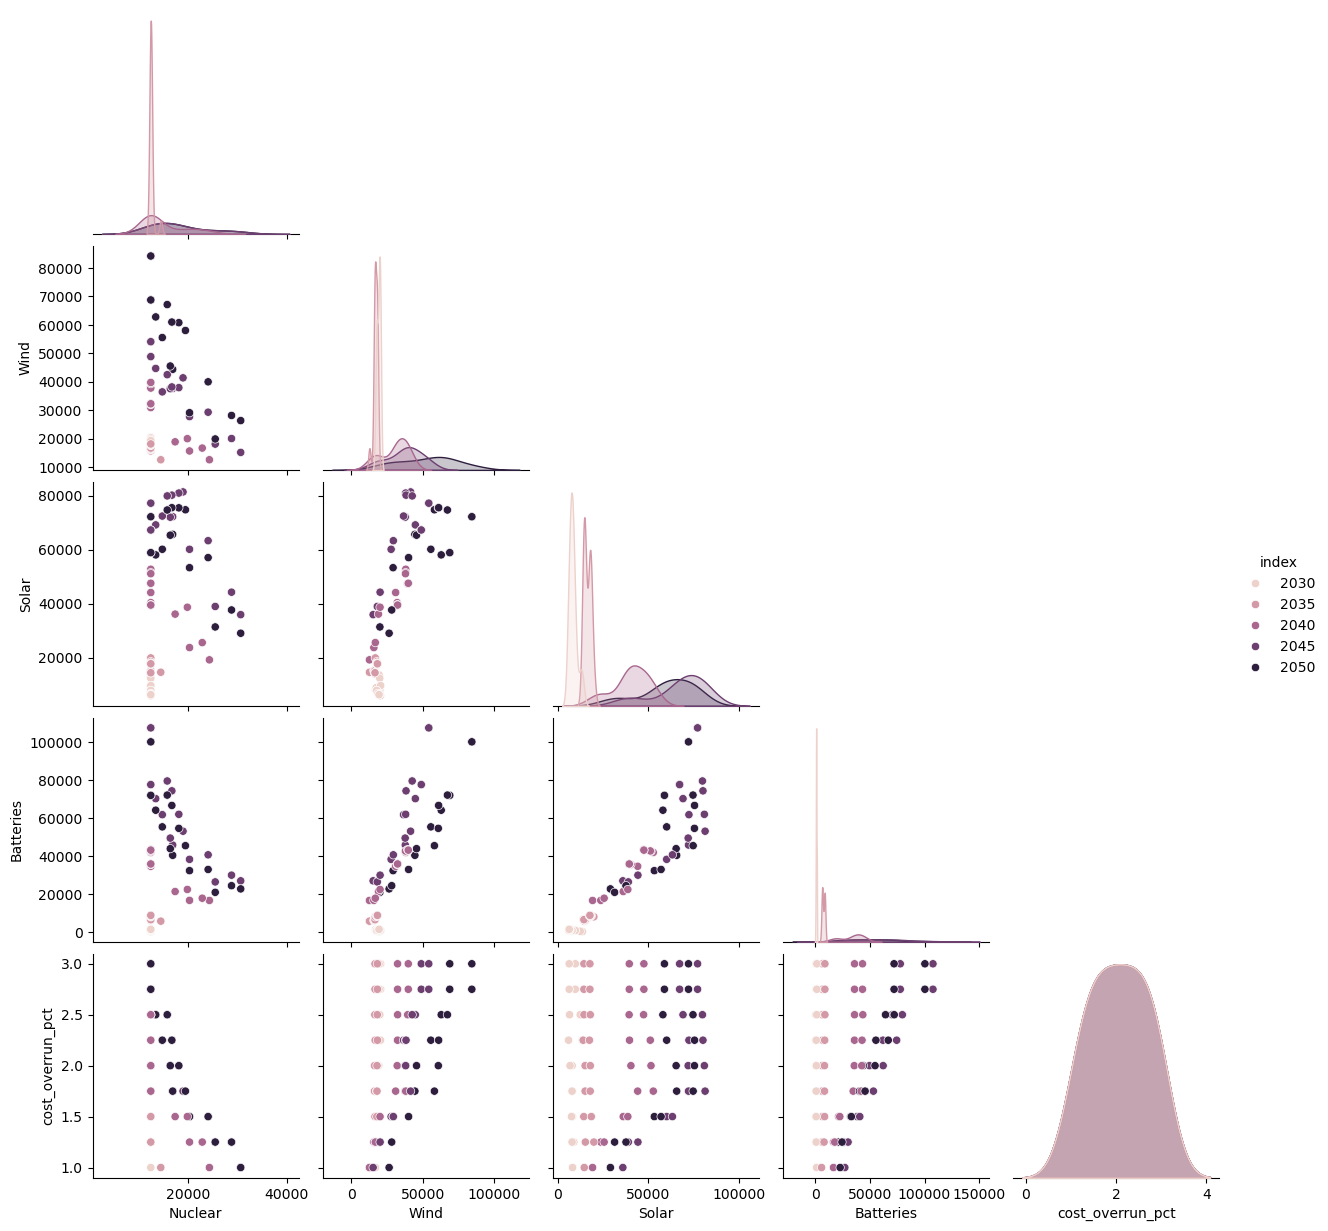

In [39]:
sb.pairplot(all_df.loc[:, ['index','Nuclear','Wind','Solar','Batteries','cost_overrun_pct']], corner=True, hue='index')

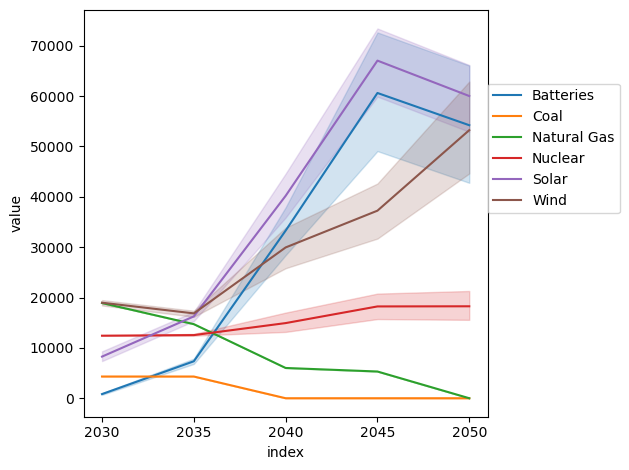

In [40]:
ax = sb.lineplot(data=data, x='index', y='value', hue='carrier')
ax.legend(loc=(1,0.5))
ax.set_xticks(data['index'].unique())
plt.tight_layout()

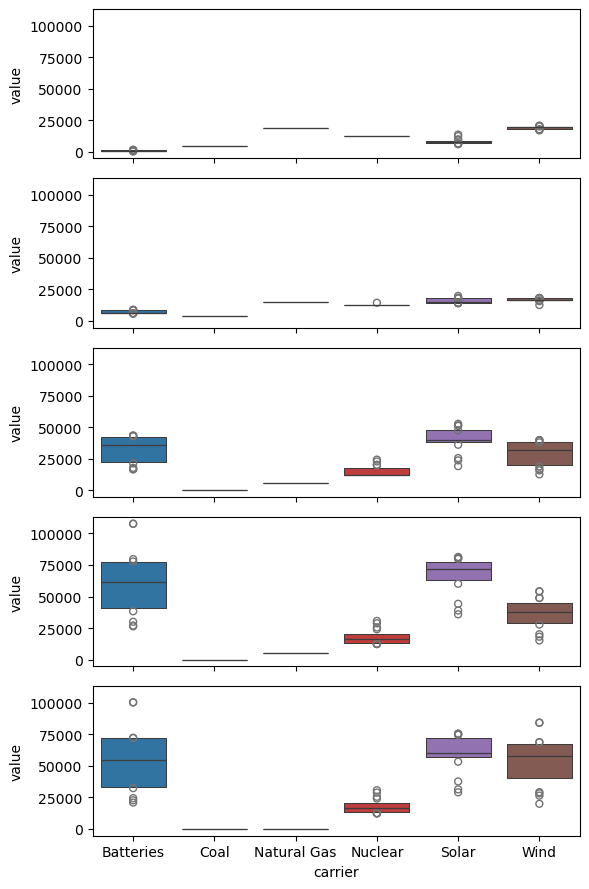

In [41]:
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(6, 9))
for i,year in enumerate(data['index'].unique().tolist()):
    ax = sb.boxenplot(ax=axes[i], data=data.loc[data['index']==year], x='carrier', y='value', hue='carrier')
    # ax.legend(loc=(1,0.5))
    # ax.set_xticks(data['index'].unique())
plt.tight_layout()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


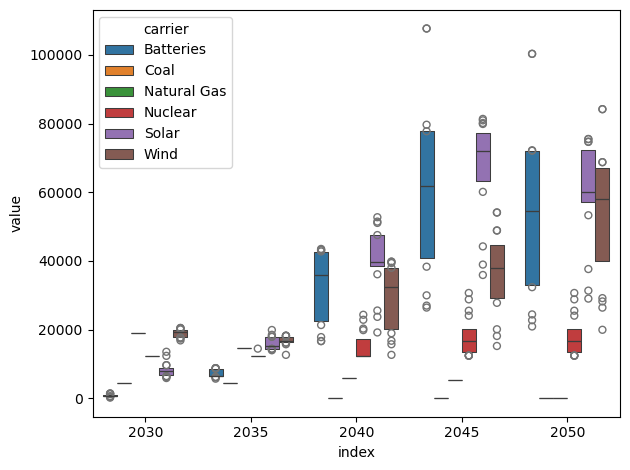

In [42]:
fig, ax = plt.subplots()
sb.boxenplot(ax=ax, data=data, x='index', y='value', hue='carrier')
plt.tight_layout()

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 1.25, 1.5 ,
       1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

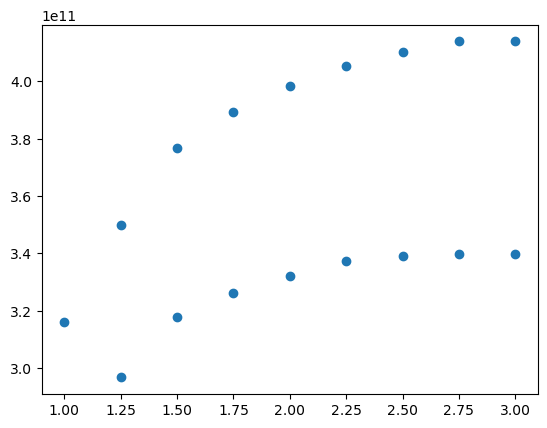

In [44]:
plt.scatter(np.append(costs, costs[1:]), objective_values)

In [48]:
all_df.loc[all_df['cost_overrun_pct']==2.75]

carrier,index,Batteries,Biomass,Coal,Natural Gas,Nuclear,Petroleum,Solar,Wind,cost_overrun_pct
35,2030,794.724298,0.0,4310.6,18905.2,12415.1,0.0,9630.494029,20461.368251,2.75
36,2035,6467.916574,0.0,4310.6,14709.2,12415.1,0.0,14376.184305,16521.378149,2.75
37,2040,35876.548239,0.0,0.0,6008.2,12415.1,0.0,39461.646684,32299.059466,2.75
38,2045,77762.193437,0.0,0.0,5306.1,12415.1,0.0,67270.036610,48863.198814,2.75
39,2050,72088.701160,0.0,0.0,0.0,12415.1,0.0,58872.142581,68761.563803,2.75
75,2030,1378.393319,0.0,4310.6,18905.2,12415.1,0.0,6253.393131,19356.662497,2.75
76,2035,8757.583007,0.0,4310.6,14709.2,12415.1,0.0,17696.664990,18195.078385,2.75
77,2040,43185.507012,0.0,0.0,6008.2,12415.1,0.0,47527.829840,39785.726070,2.75
78,2045,107699.723498,0.0,0.0,5306.1,12415.1,0.0,77199.657115,54102.897800,2.75
79,2050,100320.233809,0.0,0.0,0.0,12415.1,0.0,72178.863984,84197.645524,2.75


In [49]:
test_network = pypsa.Network("..//results//cost-2023_growth-0.02_demand-1.85E+08_atb-Moderate_v1.0//networks//illinois_solved.nc")

INFO:pypsa.io:Imported network illinois_solved.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [50]:
test_df = get_active_units(test_network).T
test_df = test_df.assign(cost_overrun_pct=10)
test_df

carrier,Batteries,Biomass,Coal,Natural Gas,Nuclear,Petroleum,Solar,Wind,cost_overrun_pct
2030,1378.393319,0.0,4310.6,18905.2,12415.1,0.0,6253.393131,19356.662497,10
2035,8757.583007,0.0,4310.6,14709.2,12415.1,0.0,17696.664990,18195.078385,10
2040,43185.507012,0.0,0.0,6008.2,12415.1,0.0,47527.829840,39785.726070,10
2045,107699.723498,0.0,0.0,5306.1,12415.1,0.0,77199.657115,54102.897800,10
2050,100320.233809,0.0,0.0,0.0,12415.1,0.0,72178.863984,84197.645524,10


In [51]:
frames.append(test_df)

In [52]:
all_df = pd.concat(frames, axis=0).reset_index()
data = all_df.melt(id_vars=['cost_overrun_pct', 'index'],
                value_vars=['Batteries','Coal','Natural Gas','Nuclear','Solar','Wind'])

In [53]:
all_results.append(test_network)

In [54]:
cost_overruns = all_df['cost_overrun_pct'].unique().tolist()

In [55]:
objective_values = [r.objective for r in all_results]
objective_values

[316078855940.4691,
 296629646217.05414,
 317888557800.56537,
 326218278807.5214,
 332184472931.70886,
 337127005622.36035,
 338927585709.1731,
 339673856662.4132,
 339673856662.4136,
 349839780273.56726,
 376787211244.9371,
 389374465203.5066,
 398353363212.32983,
 405250850176.3744,
 410380184040.54645,
 413949335059.6004,
 413949335059.60077,
 413949335059.0665]

In [56]:
test_network.loads_t.p_set.sum().sum()

1110000000.0

In [57]:
all_results[0].loads_t.p_set.sum().sum()

1110000000.0

In [59]:
cost_overruns

[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 10.0]

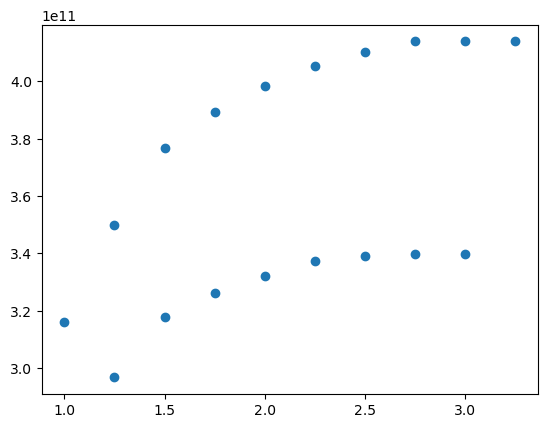

In [61]:
plt.scatter(list(np.append(costs, costs[1:]))+[3.25], objective_values)

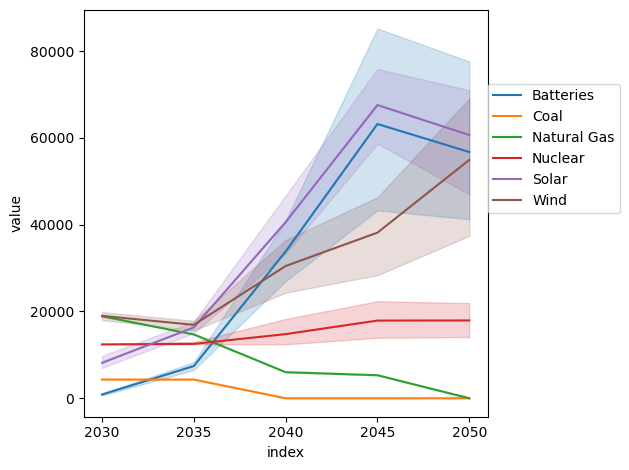

In [62]:
ax = sb.lineplot(data=data, x='index', y='value', hue='carrier', errorbar=('ci', 100))
ax.legend(loc=(1,0.5))
ax.set_xticks(data['index'].unique())
plt.tight_layout()

In [63]:
test_network.statistics()

Optimal Capacity                            \
                                    2030         2035         2040   
Generator   Biomass                  NaN          NaN          NaN   
            Coal              4310.60000   4310.60000          NaN   
            Natural Gas      18905.20000  14709.20000   6008.20000   
            Nuclear          12415.10000  12415.10000  12415.10000   
            Petroleum                NaN          NaN          NaN   
            Solar             6253.39313  17696.66499  47527.82984   
            Wind             19356.66250  18195.07839  39785.72607   
Line        AC               63861.68401  63861.68401  63861.68401   
Load        -                    0.00000      0.00000      0.00000   
StorageUnit Batteries         1378.39332   8757.58301  43185.50701   

                                                    Installed Capacity  \
                                 2045          2050               2030   
Generator   Biomass               NaN           NaN                NaN   
            Coal                  NaN           NaN             4310.6   
            Natural Gas    5306.10000           NaN            18905.2   
            Nuclear       12415.10000   12415.10000            12415.1   
            Petroleum             NaN           NaN                NaN   
            Solar         77199.65712   72178.86398             1232.6   
            Wind          54102.89780   84197.64552             7901.9   
Line        AC            63861.68401   63861.68401                NaN   
Load        -                 0.00000       0.00000                0.0   
StorageUnit Batteries    107699.72350  100320.23381                0.3   

                                                             ...  \
                            2035     2040     2045     2050  ...   
Generator   Biomass          NaN      NaN      NaN      NaN  ...   
            Coal          4310.6      NaN      NaN      NaN  ...   
            Natural Gas  14709.2   6008.2   5306.1      NaN  ...   
            Nuclear      12415.1  12415.1  12415.1  12415.1  ...   
            Petroleum        NaN      NaN      NaN      NaN  ...   
            Solar         1232.6      NaN      NaN      NaN  ...   
            Wind             NaN      NaN      NaN      NaN  ...   
Line        AC               NaN      NaN      NaN      NaN  ...   
Load        -                0.0      0.0      0.0      0.0  ...   
StorageUnit Batteries        NaN      NaN      NaN      NaN  ...   

                              Revenue                              \
                                 2030          2035          2040   
Generator   Biomass               NaN           NaN           NaN   
            Coal         8.664008e+08  1.565619e+09           NaN   
            Natural Gas  3.324618e+09  5.422421e+09  5.736707e+09   
            Nuclear      5.794574e+09  9.254610e+09  1.250075e+10   
            Petroleum             NaN           NaN           NaN   
            Solar        4.788726e+08  1.922474e+09  4.896561e+09   
            Wind         1.403390e+09  2.353574e+09  4.919319e+09   
Line        AC                    NaN           NaN           NaN   
Load        -           -1.210699e+10 -2.184920e+10 -3.509151e+10   
StorageUnit Batteries    2.391357e+08  1.330502e+09  7.038173e+09   

                                                    Market Value              \
                                 2045          2050         2030        2035   
Generator   Biomass               NaN           NaN          NaN         NaN   
            Coal                  NaN           NaN   203.205551  367.200101   
            Natural Gas           NaN           NaN   171.455817  270.075939   
            Nuclear      2.315264e+10  2.295088e+10    54.829244   87.723373   
            Petroleum             NaN           NaN          NaN         NaN   
            Solar        9.270813e+09  6.324842e+09    53.518077   83.395688   
        

In [98]:
stats = test_network.statistics.supply()

In [100]:
costs = test_network.statistics.capex()

In [105]:
nuc_costs = costs.loc[('Generator','Nuclear')].sum()

In [106]:
nuc_gen = stats.loc[('Generator','Nuclear')].sum()

In [107]:
nuc_costs/nuc_gen

19.954580101646705

In [108]:
lcoe_list = []
for result in all_results:
    capex = result.statistics.capex()
    gen = result.statistics.supply()
    nuc_costs = capex.loc[('Generator','Nuclear')].sum()
    nuc_gen = gen.loc[('Generator','Nuclear')].sum()
    
    lcoe_list.append(nuc_costs/nuc_gen)

In [109]:
lcoe_list

[59.764979167428415,
 66.80313894382988,
 58.45615302847978,
 40.39330504558677,
 40.80264782076617,
 33.87859976791964,
 26.61835041081483,
 19.97726149544151,
 19.97726149544151,
 19.954580101646705]

In [64]:
n = test_network.copy()

In [106]:
wind_gen = nc.generators[nc.generators.carrier == 'Wind'].index

In [107]:
wind_gen

Index(['MISO-Z4 Land-Based Wind EXIST', 'ComEd Land-Based Wind EXIST',
       'MISO-Z4 Land-Based Wind 2030', 'ComEd Land-Based Wind 2030',
       'MISO-Z4 Land-Based Wind 2035', 'ComEd Land-Based Wind 2035',
       'MISO-Z4 Land-Based Wind 2040', 'ComEd Land-Based Wind 2040',
       'MISO-Z4 Land-Based Wind 2045', 'ComEd Land-Based Wind 2045',
       'MISO-Z4 Land-Based Wind 2050', 'ComEd Land-Based Wind 2050'],
      dtype='object', name='Generator')

In [105]:
nc.generators.loc[wind_gen[~wind_gen.str.contains('EXIST')], 'marginal_cost']

Generator
MISO-Z4 Land-Based Wind 2030   -27.5
ComEd Land-Based Wind 2030     -27.5
MISO-Z4 Land-Based Wind 2035   -27.5
ComEd Land-Based Wind 2035     -27.5
MISO-Z4 Land-Based Wind 2040   -27.5
ComEd Land-Based Wind 2040     -27.5
MISO-Z4 Land-Based Wind 2045   -27.5
ComEd Land-Based Wind 2045     -27.5
MISO-Z4 Land-Based Wind 2050   -27.5
ComEd Land-Based Wind 2050     -27.5
Name: marginal_cost, dtype: float64

In [108]:
wind_vintage = wind_gen[wind_gen.str.contains('2040')]

In [98]:
wind_cf = 0.4

In [117]:
n.generators_t.p_max_pu.loc[2040, wind_vintage]

Generator,MISO-Z4 Land-Based Wind 2040,ComEd Land-Based Wind 2040
timestep,,
2040-01-01 00:00:00,0.638531,0.639140
2040-01-01 01:00:00,0.638531,0.639140
2040-01-01 02:00:00,0.638531,0.639140
2040-01-01 03:00:00,0.638531,0.639140
2040-01-01 04:00:00,0.638531,0.639140
...,...,...
2040-12-30 19:00:00,0.274299,0.405103
2040-12-30 20:00:00,0.380883,0.440880
2040-12-30 21:00:00,0.638531,0.639140


In [100]:
((n.generators_t.p_max_pu[wind_vintage] / (n.generators_t.p_max_pu[wind_vintage].sum() / (len(n.snapshots))) * wind_cf)).loc[2030].sum()/8760

Generator
MISO-Z4 Land-Based Wind 2040    0.395808
ComEd Land-Based Wind 2040      0.402191
dtype: float64

In [ ]:
n.generators_t.p_max_pu.loc[:, wind_gen] = ((n.generators_t.p_max_pu[wind_gen] / (
    n.generators_t.p_max_pu[wind_gen].sum() / (len(n.snapshots))) * wind_cf))

In [119]:
nc.generators[nc.generators.carrier=='Wind']

,bus,p_nom,p_nom_extendable,p_nom_min,p_min_pu,carrier,marginal_cost,build_year,lifetime,capital_cost,...,marginal_cost_quadratic,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
MISO-Z4 Land-Based Wind EXIST,MISO-Z4,2768.8,False,2768.8,0.0,Wind,0.0,2015,20.0,155485.598912,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
ComEd Land-Based Wind EXIST,ComEd,5133.1,False,5133.1,0.0,Wind,0.0,2012,20.0,155485.598912,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
MISO-Z4 Land-Based Wind 2030,MISO-Z4,0.0,True,0.0,0.0,Wind,-27.5,2030,20.0,102947.784917,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
ComEd Land-Based Wind 2030,ComEd,0.0,True,0.0,0.0,Wind,-27.5,2030,20.0,102947.784917,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
MISO-Z4 Land-Based Wind 2035,MISO-Z4,0.0,True,0.0,0.0,Wind,-27.5,2035,20.0,98287.270671,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
ComEd Land-Based Wind 2035,ComEd,0.0,True,0.0,0.0,Wind,-27.5,2035,20.0,98287.270671,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
MISO-Z4 Land-Based Wind 2040,MISO-Z4,0.0,True,0.0,0.0,Wind,-27.5,2040,20.0,93626.756426,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
ComEd Land-Based Wind 2040,ComEd,0.0,True,0.0,0.0,Wind,-27.5,2040,20.0,93626.756426,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
MISO-Z4 Land-Based Wind 2045,MISO-Z4,0.0,True,0.0,0.0,Wind,-27.5,2045,20.0,88966.242180,...,0.0,1.0,False,0.0,0.0,0.0,1.0,1.0,1.0,0.0
